# Data Collection

In [318]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('C:/Users/sahni/Downloads/processed.cleveland.data')

df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

## Data Wrangling

In [309]:
indexNames = df[df['ca'] == '?'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['thal'] == '?'].index
df.drop(indexNames, inplace=True)

df.info()
num = pd.get_dummies(df['num'])
num.head(5)
df.replace(to_replace = 1, value = 1, inplace = True)
df.replace(to_replace = 2, value = 1, inplace = True)
df.replace(to_replace = 3, value = 1, inplace = True)
df.replace(to_replace = 4, value = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    float64
 1   sex       296 non-null    float64
 2   cp        296 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      296 non-null    float64
 5   fbs       296 non-null    float64
 6   restecg   296 non-null    float64
 7   thalach   296 non-null    float64
 8   exang     296 non-null    float64
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    float64
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  num       296 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.7+ KB


# Data Analysis

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
X_scaled=scaler.transform(df)
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    67.0  1.0  1.0     160.0  286.0  0.0      1.0    108.0    1.0      1.5   
1    67.0  1.0  1.0     120.0  229.0  0.0      1.0    129.0    1.0      2.6   
2    37.0  1.0  1.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  1.0     130.0  204.0  0.0      1.0    172.0    0.0      1.4   
4    56.0  1.0  1.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
296  57.0  0.0  1.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
297  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
298  68.0  1.0  1.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
299  57.0  1.0  1.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
300  57.0  0.0  1.0     130.0  236.0  0.0      1.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      1.0  3.0  3.0   

# Using PCA for Analysing Key Components

In [310]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)
print(X_pca.shape)

[0.5301153  0.27697139 0.19291331]
(296, 3)


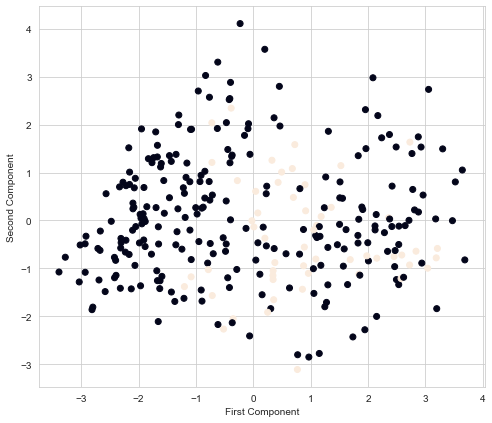

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline
Xax=X_pca[:,0]
Yax=X_pca[:,1]
#Yaxy=X_pca[:,2]

plt.figure(figsize=(8,7))
plt.scatter(Xax, Yax, c=num[1])
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

# Usinf Colorbar for Cor-relation

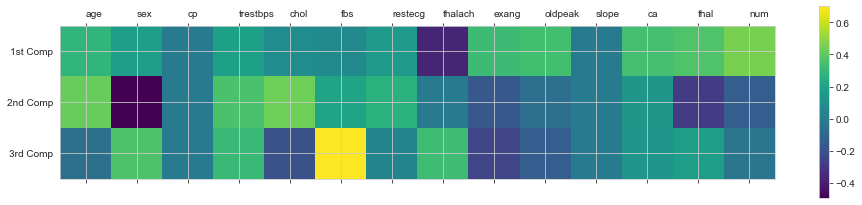

In [243]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,ha='left')
plt.show()

## Wrangling

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

y = df['num']
X = df.drop(['num'],axis=1)
print(df)

          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    1.381810  1.0  1.0  1.597628  0.742464  0.0      1.0 -1.813215    1.0   
1    1.381810  1.0  1.0 -0.656413 -0.353882  0.0      1.0 -0.897846    1.0   
2   -1.938123  1.0  1.0 -0.092903  0.050035  0.0      0.0  1.630318    0.0   
3   -1.495465  0.0  1.0 -0.092903 -0.834736  0.0      1.0  0.976483    0.0   
4    0.164501  1.0  1.0 -0.656413 -0.219243  0.0      0.0  1.238017    0.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
296  0.275166  0.0  1.0  0.470607 -0.123073  0.0      0.0 -1.159380    1.0   
297 -1.052807  1.0  1.0 -1.219924  0.319313  0.0      0.0 -0.767079    0.0   
298  1.492474  1.0  1.0  0.696011 -1.046312  1.0      0.0 -0.374777    0.0   
299  0.275166  1.0  1.0 -0.092903 -2.238829  0.0      0.0 -1.508092    1.0   
300  0.275166  0.0  1.0 -0.092903 -0.219243  0.0      1.0  1.063661    0.0   

      oldpeak  slope   ca thal  num  
0    0.503052    1.0  3.0

# Using Logistic Regression

In [313]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()

Xp = df.drop("num",axis=1)
Yt = df["num"]

## Training and Testing the Model

In [314]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Xp,Yt,test_size=0.30,random_state=0)

regr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [315]:
model = regr.predict(X_test)

## Accuracy of Prediction

In [316]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,model)

array([[42,  5],
       [ 5, 37]], dtype=int64)

In [317]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,model)

0.8876404494382022

# K-Neigbhors Classifier Model

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range (1,15):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier, x, y, cv=10)
    knn_scores.append(score.mean())

Text(0, 0.5, 'Scores')

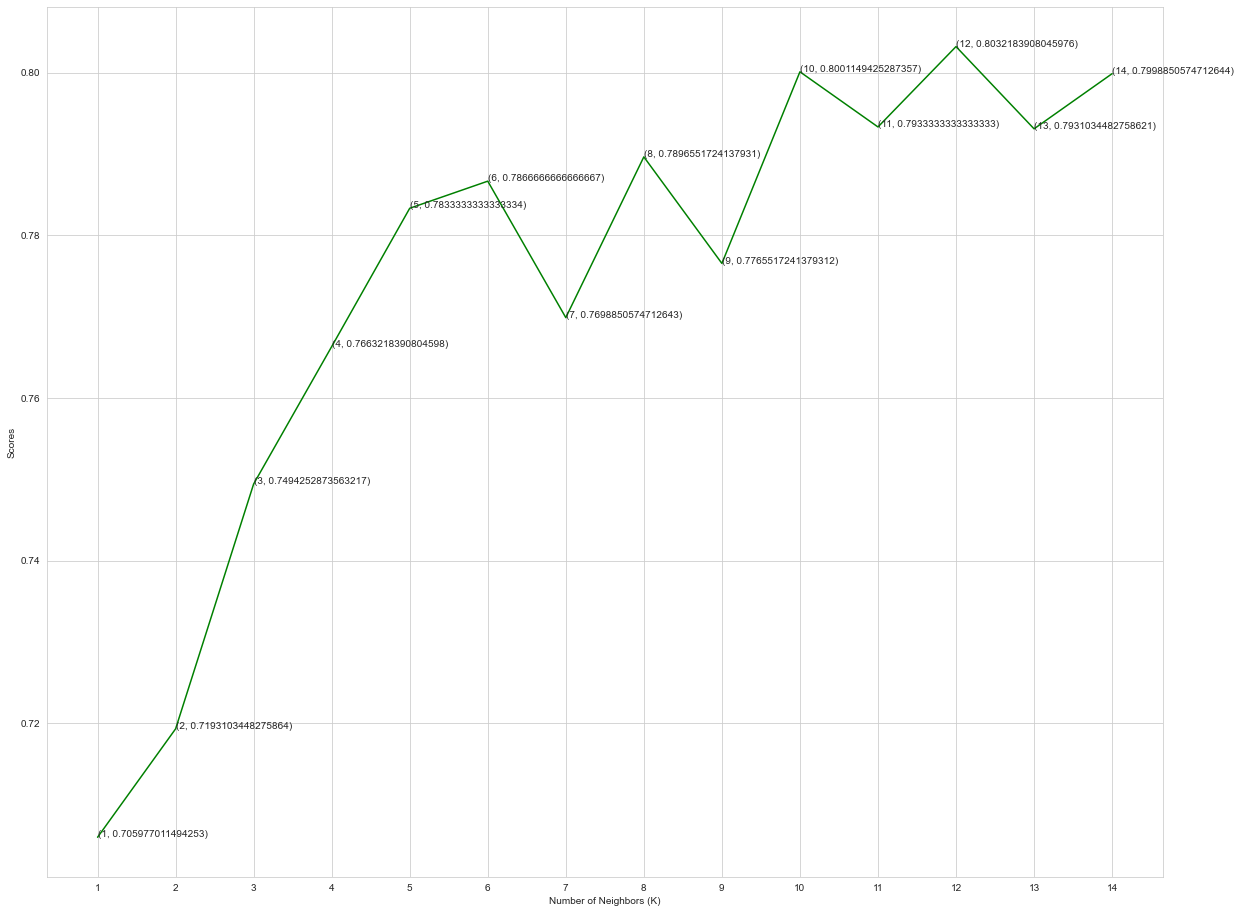

In [294]:
plt.plot([k for k in range(1,15)], knn_scores, color = 'green')
for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

## Accuracy Check

In [299]:
knn_classifier = KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier, x, y, cv=10)

In [300]:
score.mean()

0.8032183908045976

# RandomForest Classifier

In [239]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X,y)

## Accuracy Check

In [284]:
randomforest_classifier = RandomForestClassifier(n_estimators=50)
score=cross_val_score(randomforest_classifier, X, y, cv=10)
score.mean()

0.8136781609195403